# Customer Segmentation - RFM Analysis

This notebook is about customer segmentation using RFM analysis. RFM stands for Recency, Frequency, and Monetary Value. It is a technique used to segment customers based on their transaction history. It is a very popular technique in retail and e-commerce businesses. The goal of RFM analysis is to segment customers into different groups based on their transaction history and then use these segments to develop targeted marketing strategies.

## Required Libraries

In [1]:
import pandas as pd 
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score 
import seaborn as sns
from matplotlib import pyplot as plt 
from datetime import datetime

## Load Data
import low memory false


In [2]:

df = pd.read_csv("PBL5recommendationdata.csv", encoding = "latin-1")

/tmp/ipykernel_17247/2167015843.py:1: DtypeWarning: Columns (20,33,73,106,158) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("PBL5recommendationdata.csv", encoding = "latin-1")


## EDA - Exploratory Data Analysis

In [3]:
df.head()

,Customers.id,Customers.fname,Customers.lname,Customers.company,Customers.create_date,Customers.status,Customers.mailing,Customers.reminders,Customers.tax_exempt,Customers.account_id,...,Products.google_shopping_label,Products.product_option,Products.size,Products.material,Products.arm_style,Products.leg_style,Products.seat_size,Products.family_id,Products.saved_status,Products.freight_cost
0,797,Christy,Dill,Company0,1426018724,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PF61071,0.0,NaN
1,3,John,Smith,Company1,1386089139,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PF02132,NaN,NaN
2,3,John,Smith,Company1,1386089139,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2 x Extra large,Nitrile,NaN,NaN,NaN,PF00342,0.0,NaN
3,4,James,Anderson,NaN,1386780263,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PF04970,NaN,NaN
4,5,Abraham,Pollak,Company3,1386861599,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PF03045,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4194 entries, 0 to 4193
Columns: 181 entries, Customers.id to Products.freight_cost
dtypes: float64(98), int64(10), object(73)
memory usage: 5.8+ MB


In [5]:
df.sample(10)

,Customers.id,Customers.fname,Customers.lname,Customers.company,Customers.create_date,Customers.status,Customers.mailing,Customers.reminders,Customers.tax_exempt,Customers.account_id,...,Products.google_shopping_label,Products.product_option,Products.size,Products.material,Products.arm_style,Products.leg_style,Products.seat_size,Products.family_id,Products.saved_status,Products.freight_cost
206,207,Marlys,Oie,NaN,1403541729,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RS4,0.0,NaN
3346,2880,Melinda,DalSanto,NaN,1458345467,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PF04825,0.0,NaN
4161,3702,ERWIN,CORTEZ,NaN,1463246262,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PF04657,3.0,NaN
895,748,cynthia,Shaffer,NaN,1424731556,NaN,NaN,NaN,NaN,NaN,...,5.0,NaN,NaN,NaN,NaN,NaN,NaN,PF21897,3.0,NaN
3825,3383,Thomas,Edens,NaN,1461713816,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Desk Length Removable Arms - Elevating Foot Rest,NaN,"22"" x 18""",PF05040,3.0,NaN
3916,3457,Chrles,Ingram,NaN,1462198892,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Plastic Rim,NaN,NaN,NaN,PF06157,3.0,NaN
1879,1571,Martha,Albarado,NaN,1441908550,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PF04832,0.0,NaN
3659,3212,Irene,Mulholland,NaN,1460601121,NaN,1.0,NaN,NaN,NaN,...,NaN,Adjustable Height,NaN,NaN,NaN,NaN,NaN,CA010,0.0,NaN
2205,1845,Daisy,White,NaN,1448761658,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PF06567,0.0,NaN
1795,1497,VERLIE,GREENER,NaN,1440805435,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,"Large / Waist Size - 40""-56""",NaN,NaN,NaN,NaN,PF01515,0.0,NaN


In [6]:
df.isnull().sum()

Customers.id                0
Customers.fname             0
Customers.lname             0
Customers.company        3467
Customers.create_date       0
                         ... 
Products.leg_style       4194
Products.seat_size       4032
Products.family_id        325
Products.saved_status     264
Products.freight_cost    4194
Length: 181, dtype: int64

In [7]:
df['Customers.customer_type'].fillna(df['Customers.customer_type'].mode()[0], inplace=True)
df['Customers.customer_type'] = df['Customers.customer_type'].astype('int64')


In [8]:
df = df.dropna(subset=['Products.id'])
df = df.dropna(subset=['Orders.placed_date'])
df = df.dropna(subset=['Orders.payment_status'])

In [9]:
df_c = df[[col for col in df.columns if col.startswith('Customers.')]] 
products_df = df[[col for col in df.columns if col.startswith('Products.')]] 
df_o = df[[col for col in df.columns if col.startswith('Orders.') or col.startswith('Order_Items.')]]

In [10]:
df_c.head()

,Customers.id,Customers.fname,Customers.lname,Customers.company,Customers.create_date,Customers.status,Customers.mailing,Customers.reminders,Customers.tax_exempt,Customers.account_id,Customers.sales_rep,Customers.rewards,Customers.profile_id,Customers.last_modified,Customers.customer_type
0,797,Christy,Dill,Company0,1426018724,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1437764306,0
1,3,John,Smith,Company1,1386089139,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1437764354,0
2,3,John,Smith,Company1,1386089139,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1437764354,0
3,4,James,Anderson,NaN,1386780263,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1437762646,0
4,5,Abraham,Pollak,Company3,1386861599,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1437764316,0


In [11]:
df_c.columns = [col.split('.')[1] for col in df_c.columns]

In [12]:
df_c.isnull().sum() # I need to fill customer_type before divide three dfs

id                  0
fname               0
lname               0
company          3325
create_date         0
status           3941
mailing          1976
reminders        4032
tax_exempt       4027
account_id       4030
sales_rep        4032
rewards          4032
profile_id       4032
last_modified       0
customer_type       0
dtype: int64

In [13]:
df_c['create_date'] = pd.to_datetime(df_c['create_date'], unit='s')
df_c['create_date'] = pd.to_datetime(df_c['create_date']).dt.date
df_c['last_modified'] = pd.to_datetime(df_c['last_modified'], unit='s')
df_c['last_modified'] = pd.to_datetime(df_c['last_modified']).dt.date

/tmp/ipykernel_17247/1151187921.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customers_df['create_date'] = pd.to_datetime(customers_df['create_date'], unit='s')
/tmp/ipykernel_17247/1151187921.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customers_df['create_date'] = pd.to_datetime(customers_df['create_date']).dt.date
/tmp/ipykernel_17247/1151187921.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

In [14]:
df_o.columns = [col.split('.')[1] if col.startswith('Orders.') else 'item_' + col.split('.')[1] for col in df_o.columns]

In [15]:
df_o["shipping"] = df_o["total"] - df_o["subtotal"] # I need to drop which product_id and payment_status is null before dividing

/tmp/ipykernel_17247/1735684852.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_o["shipping"] = df_o["total"] - df_o["subtotal"] # I need to drop which product_id and payment_status is null before dividing


In [16]:
df_o.isnull().sum()

id                           0
customer_id                  0
fname                        0
lname                        0
company                   3324
                          ... 
item_registry_item        4032
item_related_id           4032
item_reorder_frequency    4013
item_account_id           4032
item_flags                3088
Length: 68, dtype: int64

In [17]:
df_o['placed_date'] = pd.to_datetime(df_o['placed_date'], unit='s')

/tmp/ipykernel_17247/4012406512.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_o['placed_date'] = pd.to_datetime(df_o['placed_date'], unit='s')


In [18]:
df_o['placed_date'] = pd.to_datetime(df_o['placed_date']).dt.date

/tmp/ipykernel_17247/1042538051.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_o['placed_date'] = pd.to_datetime(df_o['placed_date']).dt.date


In [19]:
products_df.columns = [col.split('.')[1] for col in products_df.columns]

In [20]:
products_df.head()

,id,status,product_type,template,vendor,import_id,name,display_name,menu_name,list_price,...,google_shopping_label,product_option,size,material,arm_style,leg_style,seat_size,family_id,saved_status,freight_cost
0,2310.0,0.0,NaN,sub-product-detail.html,1.0,3.0,"Basic Steel Rollators,Green","Basic Lightweight Rollators For Adults, With S...",NaN,80.70,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PF61071,0.0,NaN
1,177.0,1.0,NaN,sub-product-detail.html,1.0,3.0,Urinary Drain Bags,Urinary Drain Bags,NaN,14.41,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PF02132,NaN,NaN
2,1.0,0.0,NaN,sub-product-detail.html,1.0,3.0,"SensiCare Nitrile Exam Gloves,Blue,XX-Large","SensiCare Nitrile Exam Gloves, Blue, XX-Large",NaN,96.29,...,NaN,NaN,2 x Extra large,Nitrile,NaN,NaN,NaN,PF00342,0.0,NaN
3,983.0,0.0,NaN,sub-product-detail.html,1.0,3.0,Basket for 2-Button Walkers,Basket for 2-Button Walkers,NaN,27.38,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PF04970,NaN,NaN
4,991.0,1.0,NaN,sub-product-detail.html,1.0,3.0,TENS 3000 Analog Unit,TENS 3000 Analog Unit,NaN,50.47,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PF03045,NaN,NaN


In [21]:
products_df.isnull().sum()

id                 0
status             0
product_type    4032
template          64
vendor             0
                ... 
leg_style       4032
seat_size       3870
family_id        168
saved_status     107
freight_cost    4032
Length: 98, dtype: int64

In [22]:
df_c.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4032 entries, 0 to 4193
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             4032 non-null   int64  
 1   fname          4032 non-null   object 
 2   lname          4032 non-null   object 
 3   company        707 non-null    object 
 4   create_date    4032 non-null   object 
 5   status         91 non-null     float64
 6   mailing        2056 non-null   float64
 7   reminders      0 non-null      float64
 8   tax_exempt     5 non-null      float64
 9   account_id     2 non-null      float64
 10  sales_rep      0 non-null      float64
 11  rewards        0 non-null      float64
 12  profile_id     0 non-null      float64
 13  last_modified  4032 non-null   object 
 14  customer_type  4032 non-null   int64  
dtypes: float64(8), int64(2), object(5)
memory usage: 504.0+ KB


In [23]:
# Fill null values in df_o.item_cost with matching values from products_df.cost
df_o['item_cost'] = df_o.apply(
    lambda row: products_df.loc[products_df['id'] == row['item_product_id'], 'cost'].values[0] 
    if pd.isnull(row['item_cost']) else row['item_cost'], 
    axis=1
)

/tmp/ipykernel_17247/2408764976.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_o['item_cost'] = df_o.apply(


In [24]:
df_o[df_o["item_cost"].isnull()]

,id,customer_id,fname,lname,company,order_number,reorder_id,external_source,external_id,currency,...,item_attribute_names,item_attribute_prices,item_qty,item_price,item_cost,item_registry_item,item_related_id,item_reorder_frequency,item_account_id,item_flags


In [25]:
df_o.head()

,id,customer_id,fname,lname,company,order_number,reorder_id,external_source,external_id,currency,...,item_attribute_names,item_attribute_prices,item_qty,item_price,item_cost,item_registry_item,item_related_id,item_reorder_frequency,item_account_id,item_flags
0,3758,797,Christy,Dill,Company0,3758,NaN,NaN,NaN,USD,...,NaN,NaN,1,57.20,44.00,NaN,NaN,NaN,NaN,NaN
1,23,3,John,Smith,Company1,23,NaN,NaN,NaN,USD,...,NaN,NaN,4,5.00,1.87,NaN,NaN,NaN,NaN,2.0
2,9531,3,John,Smith,Company1,9531,NaN,NaN,NaN,USD,...,NaN,NaN,1,68.78,52.50,NaN,NaN,NaN,NaN,NaN
3,29,4,James,Anderson,NaN,29,NaN,Ebay,NaN,USD,...,NaN,NaN,1,19.56,12.62,NaN,NaN,NaN,NaN,NaN
4,30,5,Abraham,Pollak,Company3,30,NaN,NaN,NaN,USD,...,NaN,NaN,1,36.05,25.75,NaN,NaN,NaN,NaN,NaN


In [26]:
df_o["net_profit"] = df_o["item_qty"] * (df_o["item_price"] - df_o["item_cost"])

/tmp/ipykernel_17247/1284350025.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_o["net_profit"] = df_o["item_qty"] * (df_o["item_price"] - df_o["item_cost"])


In [27]:
import sqlite3
import pandas as pd

# Create a SQLite database
conn = sqlite3.connect('my_database.db')

# Write the DataFrames to the database
df_c.to_sql('customers', conn, if_exists='replace', index=False)
products_df.to_sql('products', conn, if_exists='replace', index=False)
df_o.to_sql('orders', conn, if_exists='replace', index=False)

# Close the connection
conn.close()

In [28]:
# the connection
conn = sqlite3.connect('my_database.db')

# Query
rfm_df = pd.read_sql_query("""
        SELECT  customers.id as customer_id,
                customers.customer_type as customer_type,
                orders.id as order_id,
                orders.placed_date as order_date,
                orders.total as order_total,
                orders.item_qty as item_count,
                orders.item_price as item_price,
                orders.payment_status as pay_status,
                products.id as product_id,
                orders.net_profit as net_profit          
        FROM orders 
        JOIN customers on customers.id = orders.customer_id
        JOIN products ON orders.item_product_id = products.id
        """, conn)

# Close the connection
conn.close()

In [29]:
rfm_df.head()

,customer_id,customer_type,order_id,order_date,order_total,item_count,item_price,pay_status,product_id,net_profit
0,797,0,3758,2015-03-10,64.29,1,57.20,3.0,2310.0,13.20
1,797,0,3758,2015-03-10,64.29,1,57.20,3.0,2310.0,13.20
2,3,0,23,2013-12-03,29.99,4,5.00,3.0,177.0,12.52
3,3,0,23,2013-12-03,29.99,4,5.00,3.0,177.0,12.52
4,3,0,9531,2015-12-08,78.73,1,68.78,3.0,1.0,16.28


In [30]:
rfm_df.isnull().sum()

customer_id      0
customer_type    0
order_id         0
order_date       0
order_total      0
item_count       0
item_price       0
pay_status       0
product_id       0
net_profit       0
dtype: int64

In [31]:
rfm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162682 entries, 0 to 162681
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   customer_id    162682 non-null  int64  
 1   customer_type  162682 non-null  int64  
 2   order_id       162682 non-null  int64  
 3   order_date     162682 non-null  object 
 4   order_total    162682 non-null  float64
 5   item_count     162682 non-null  int64  
 6   item_price     162682 non-null  float64
 7   pay_status     162682 non-null  float64
 8   product_id     162682 non-null  float64
 9   net_profit     162682 non-null  float64
dtypes: float64(5), int64(4), object(1)
memory usage: 12.4+ MB


In [32]:
rfm_df['product_id'] = rfm_df['product_id'].astype('int64')
rfm_df['pay_status'] = rfm_df['pay_status'].astype('int64')
rfm_df['order_date'] = pd.to_datetime(rfm_df['order_date'])

In [33]:
rfm_df.head()

,customer_id,customer_type,order_id,order_date,order_total,item_count,item_price,pay_status,product_id,net_profit
0,797,0,3758,2015-03-10,64.29,1,57.20,3,2310,13.20
1,797,0,3758,2015-03-10,64.29,1,57.20,3,2310,13.20
2,3,0,23,2013-12-03,29.99,4,5.00,3,177,12.52
3,3,0,23,2013-12-03,29.99,4,5.00,3,177,12.52
4,3,0,9531,2015-12-08,78.73,1,68.78,3,1,16.28


### RFM

In [34]:

# Calculate Recency
rfm_df['Recency'] = (datetime.now().date() - rfm_df['order_date'].dt.date)

# Calculate Frequency
frequency_data = rfm_df.groupby('customer_id')['order_id'].count().reset_index()
frequency_data.rename(columns={'order_id': 'Frequency'}, inplace=True)
rfm_df = rfm_df.merge(frequency_data, on='customer_id', how='left')

# Calculate Monetary Value
monetary_data = rfm_df.groupby('customer_id')['order_total'].sum().reset_index()
monetary_data.rename(columns={'order_total': 'MonetaryValue'}, inplace=True)
rfm_df = rfm_df.merge(monetary_data, on='customer_id', how='left')

In [35]:
rfm_df.sample(2)

,customer_id,customer_type,order_id,order_date,order_total,item_count,item_price,pay_status,product_id,net_profit,Recency,Frequency,MonetaryValue
141432,2169,0,11435,2016-01-12,117.31,1,37.99,3,1862,18.01,"3113 days, 0:00:00",196,22992.76
5281,213,0,941,2014-06-29,154.58,1,88.40,3,1867,20.40,"3675 days, 0:00:00",972,133008.39


In [36]:
rfm_df['Recency'] = rfm_df['Recency'].astype(str)
rfm_df['Recency'] = rfm_df['Recency'].str.extract('(\d+)').astype(int)

In [37]:
# Define scoring criteria for each RFM value
recency_scores   = [5, 4, 3, 2, 1]  # Higher score for lower recency (more recent)
frequency_scores = [1, 2, 3, 4, 5]  # Higher score for higher frequency
monetary_scores  = [1, 2, 3, 4, 5]  # Higher score for higher monetary value

# Calculate RFM scores
rfm_df['RecencyScore'] = pd.cut(rfm_df['Recency'], bins=5, labels=recency_scores)
rfm_df['FrequencyScore'] = pd.cut(rfm_df['Frequency'], bins=5, labels=frequency_scores)
rfm_df['MonetaryScore'] = pd.cut(rfm_df['MonetaryValue'], bins=5, labels=monetary_scores)

In [38]:
# Convert RFM scores to numeric type
rfm_df['RecencyScore'] = rfm_df['RecencyScore'].astype(int)
rfm_df['FrequencyScore'] = rfm_df['FrequencyScore'].astype(int)
rfm_df['MonetaryScore'] = rfm_df['MonetaryScore'].astype(int)

In [39]:
# Calculate RFM score by combining the individual scores
rfm_df['RFM_Score'] = rfm_df['RecencyScore'] + rfm_df['FrequencyScore'] + rfm_df['MonetaryScore']


In [40]:
rfm_df.sample(5)

,customer_id,customer_type,order_id,order_date,order_total,item_count,item_price,pay_status,product_id,net_profit,Recency,Frequency,MonetaryValue,RecencyScore,FrequencyScore,MonetaryScore,RFM_Score
34627,412,0,15035,2016-04-01,162.25,3,54.10,3,2107,27.48,3033,5670,1309020.30,5,2,1,8
150713,2799,0,13996,2016-03-11,16.23,1,16.23,3,1842,4.12,3054,88,1428.24,5,1,1,7
123015,1371,0,16325,2016-04-30,164.41,2,48.99,3,1469,20.00,3004,18690,2706151.35,5,4,2,11
150973,2810,0,14038,2016-03-13,150.86,2,37.99,3,1862,31.98,3052,196,29568.56,5,1,1,7
90094,1043,0,12992,2016-02-20,433.97,2,62.99,3,2109,21.54,3074,26609,9542478.17,5,5,5,15


In [41]:
rfm_df.columns

Index(['customer_id', 'customer_type', 'order_id', 'order_date', 'order_total',
       'item_count', 'item_price', 'pay_status', 'product_id', 'net_profit',
       'Recency', 'Frequency', 'MonetaryValue', 'RecencyScore',
       'FrequencyScore', 'MonetaryScore', 'RFM_Score'],
      dtype='object')

In [42]:
x = rfm_df[['Recency', 'Frequency', 'MonetaryValue', 'RecencyScore',
       'FrequencyScore', 'MonetaryScore', 'RFM_Score']]

In [43]:
from yellowbrick.cluster import KElbowVisualizer;

In [44]:
km = KMeans()

In [45]:
vis = KElbowVisualizer(km,k=(2,10))

/home/cevheri/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/cevheri/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/cevheri/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/cevheri/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/cevheri/an

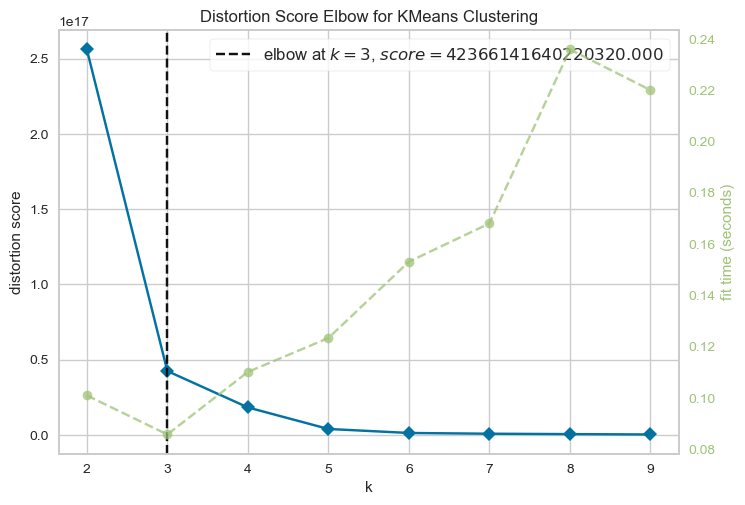

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [46]:
vis.fit(x)
vis.show()

In [47]:
model = KMeans(3) 

In [48]:
model = model.fit(x)

/home/cevheri/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [49]:
pred = model.predict(x)

In [50]:
pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [51]:
x["cluster"] = pred

/tmp/ipykernel_17247/86849302.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x["cluster"] = pred


In [52]:
x.head()

,Recency,Frequency,MonetaryValue,RecencyScore,FrequencyScore,MonetaryScore,RFM_Score,cluster
0,3421,2,128.58,3,1,1,5,0
1,3421,2,128.58,3,1,1,5,0
2,3883,4,217.44,1,1,1,3,0
3,3883,4,217.44,1,1,1,3,0
4,3148,4,217.44,5,1,1,7,0


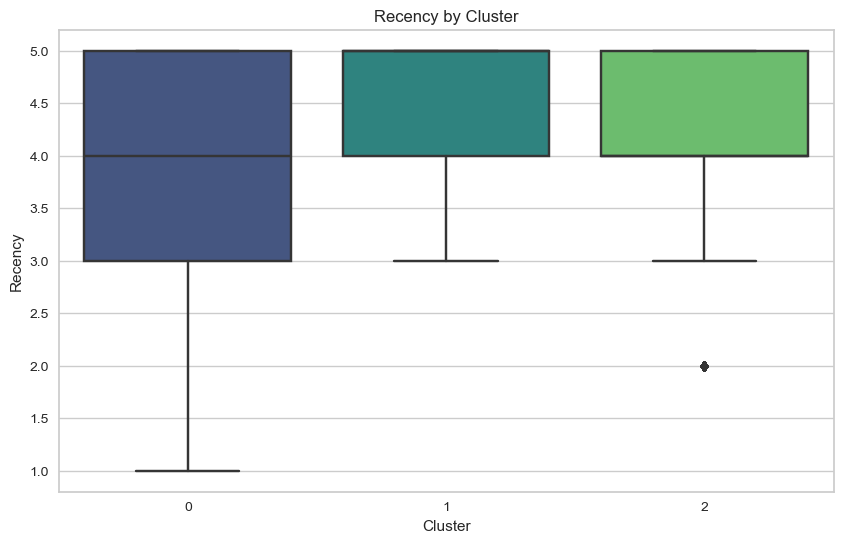

In [53]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='cluster', y='RecencyScore', data=x, palette='viridis')
plt.title('Recency by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Recency')
plt.show()

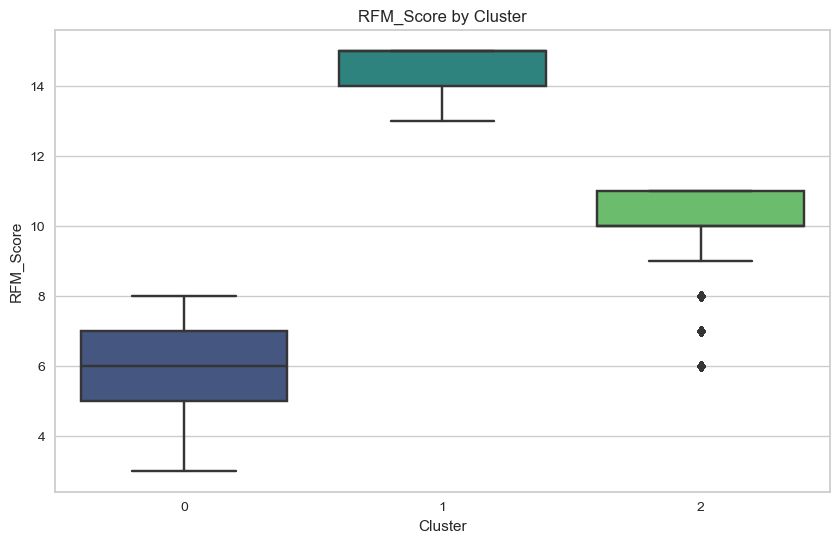

In [56]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='cluster', y='RFM_Score', data=x, palette='viridis')
plt.title('RFM_Score by Cluster')
plt.xlabel('Cluster')
plt.ylabel('RFM_Score')
plt.show()

In [57]:
silhouette_score(x, pred)

0.8247817328954138